导入数据（数据准备）

In [8]:
import pandas as pd #数据表

In [10]:
# 从Excel文件中读取数据并创建DataFrame，将第一列(index=0)作为行索引
df=pd.read_excel('text_analysis_ad_sample.xlsx',index_col=0)

In [11]:
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


分词

In [13]:
import jieba #中文分词

In [17]:
# 从DataFrame中提取第一行(index=0)的"广告文本"列数据，并赋值给变量test
test=df['广告文本'][0]

In [19]:
def clean_text(text):
    """
    使用jieba库对输入的中文文本进行分词处理，并返回以空格分隔的分词结果。
    
    参数:
        text (str): 需要进行分词的中文文本
    
    返回:
        str: 分词后以空格连接的字符串
    """
    # 使用jieba.lcut()方法对输入文本进行分词，返回分词列表
    words=jieba.lcut(text)
    # 将分词列表中的词语用空格连接成一个字符串并返回
    return ' '.join(words)

In [21]:
# 调用clean_text函数对变量test中的中文文本进行分词处理，将文本切割为单个词语并用空格连接
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/fk/9jmgcs5n4yl9cmhv3wdqb3_m0000gn/T/jieba.cache
Loading model cost 0.782 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [23]:
# 对DataFrame中"广告文本"列的每个元素应用clean_text函数进行分词处理，
# 并将结果存储在新创建的"广告文本分词"列中
df['广告文本分词']=df['广告文本'].apply(clean_text)

词向量模型

In [26]:
# 从gensim库的测试工具模块中导入common_texts示例数据集
# 该数据集包含一组预分词的短文本列表，常用于快速演示和测试NLP模型
from gensim.test.utils import common_texts

In [28]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [30]:
sentences=df['广告文本分词'].apply(lambda x:x.split()).tolist()#切分语词

In [32]:
for document in sentences[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [34]:
#自己训练词嵌入模型
from gensim.models import Word2Vec

In [36]:
#训练词嵌入模型
model=Word2Vec(
    sentences,#训练语科
    window=5,
    vector_size=100,#自定义训练向量维度
)

In [37]:
#保存训练好的模型
#model.save('Word2Vec)

In [40]:
word_list=model.wv.index_to_key#获取词汇表

In [42]:
word_vectors=model.wv[word_list]#获取词向量

In [44]:
#打印词汇表和对应的词向量
for word,vector in list(zip(word_list,word_vectors))[:5]:
    print (f'{word}:{vector}')

之:[-0.57649493  0.7150624   0.06905743 -0.4993984  -0.26489764 -1.5254313
  0.8584032   1.7244579  -0.38526914 -0.4444848  -0.12476002 -1.4127065
 -0.11300856  0.5908686   0.09787133 -0.69844085 -0.14442086 -0.48458818
  0.09140081 -1.3131521   0.7690591   0.14580822  0.12136432 -0.08224593
 -0.00465372 -0.11447081  0.08833037 -0.63689405 -0.8224975  -0.29007292
  0.8837264   0.10692551  0.25236496 -0.23389098 -0.29316682  1.3401986
  0.40734115 -0.87697667 -0.54504174 -1.6559064   0.08948047 -0.4390224
 -0.2081915   0.0969647   0.73852026 -0.45098528 -0.7622246  -0.04203099
  0.59884506  0.17184849  0.30530006 -0.6146374  -0.35101265 -0.13885573
 -0.03292069  0.3619013   0.3449562  -0.02328415 -0.5786802   0.05624469
  0.27284232  0.2655957  -0.31090763 -0.02361314 -0.80757713  0.80831295
  0.13627294  0.88436675 -0.677852    1.3049928  -0.6376741   0.51203454
  0.5446014  -0.30786145  0.99338794  0.5847844   0.1873209  -0.21052536
 -0.64732236  0.03829717 -0.3323336   0.27360758 -0.6

In [46]:
#检查词向量模型中任意两个词词向量的余弦相似度，即语义接近性
#余弦相似度的取值介于[-1,1]之间，-1代表语义完全相反，1代表完全相同，0表示毫无关系
print(model.wv.similarity('医生','疼痛'))
print(model.wv.similarity('医生','神经'))
print(model.wv.similarity('医生','伤风'))
print(model.wv.similarity('疼痛','神经'))
print(model.wv.similarity('疼痛','伤风'))
print(model.wv.similarity('神经','伤风'))

0.8503756
0.8390322
0.8437706
0.99869585
0.99947953
0.998533


In [48]:
model.wv.most_similar('卫生')

[('亦', 0.9996570348739624),
 ('不', 0.9996439218521118),
 ('一切', 0.9996320009231567),
 ('身体', 0.9996077418327332),
 ('所', 0.999603807926178),
 ('等', 0.9996019005775452),
 ('如', 0.9995999336242676),
 ('乃', 0.999592125415802),
 ('及', 0.9995908141136169),
 ('即', 0.9995841979980469)]

可视化词向量

In [7]:
from matplotlib import font_manager

# 列出系统所有可用字体路径
#for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    #print(font)

In [9]:
# 获取所有字体的名字和路径
#for font in font_manager.fontManager.ttflist:
    #print(font.name, font.fname)

使用中文字体: /System/Library/AssetsV2/com_apple_MobileAsset_Font7/857d6c90171c328a4892c1492291d34e401d7f25.asset/AssetData/SimSong.ttc


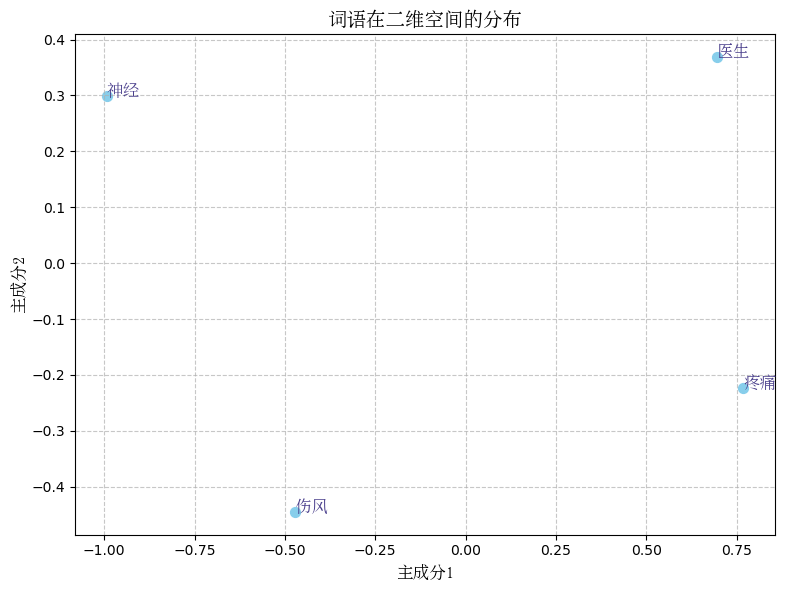

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.font_manager import FontProperties, findSystemFonts
import os

# 示例数据
np.random.seed(42)
X = np.random.rand(4, 10)  # 4个词语，每个词语用10维向量表示
words = ["医生", "疼痛", "伤风", "神经"]

# 执行PCA降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# 查找中文字体路径（macOS适用）
def find_chinese_font():
    # macOS系统字体路径
    font_paths = [
        "/System/Library/AssetsV2/com_apple_MobileAsset_Font7/857d6c90171c328a4892c1492291d34e401d7f25.asset/AssetData/SimSong.ttc"
    ]
    
    # 检查字体文件是否存在
    for path in font_paths:
        if os.path.exists(path):
            return path
    
    # 如果找不到预设字体，尝试查找系统中所有中文字体
    system_fonts = findSystemFonts()
    for font in system_fonts:
        if any(keyword in font.lower() for keyword in ["hei", "song", "kai", "fang"]):
            return font
    
    # 如果仍未找到，返回None
    return None

# 获取中文字体路径
font_path = find_chinese_font()

if font_path:
    # 使用找到的字体路径创建FontProperties对象
    font_prop = FontProperties(fname=font_path)
    print(f"使用中文字体: {font_path}")
else:
    # 如果未找到中文字体，使用默认字体
    font_prop = FontProperties()
    print("警告: 未找到中文字体，图表文字可能无法正确显示")

# 创建图表
plt.figure(figsize=(8, 6))

# 绘制散点图
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50, color='skyblue')

# 添加词语标签
for i, word in enumerate(words):
    plt.annotate(word, 
                 (pca_result[i, 0], pca_result[i, 1]), 
                 fontproperties=font_prop, 
                 fontsize=12,
                 color='darkslateblue',
                 weight='bold')

# 设置标题和坐标轴标签
plt.title('词语在二维空间的分布', fontproperties=font_prop, fontsize=14)
plt.xlabel('主成分1', fontproperties=font_prop, fontsize=12)
plt.ylabel('主成分2', fontproperties=font_prop, fontsize=12)

# 添加网格和样式
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 显示图表
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

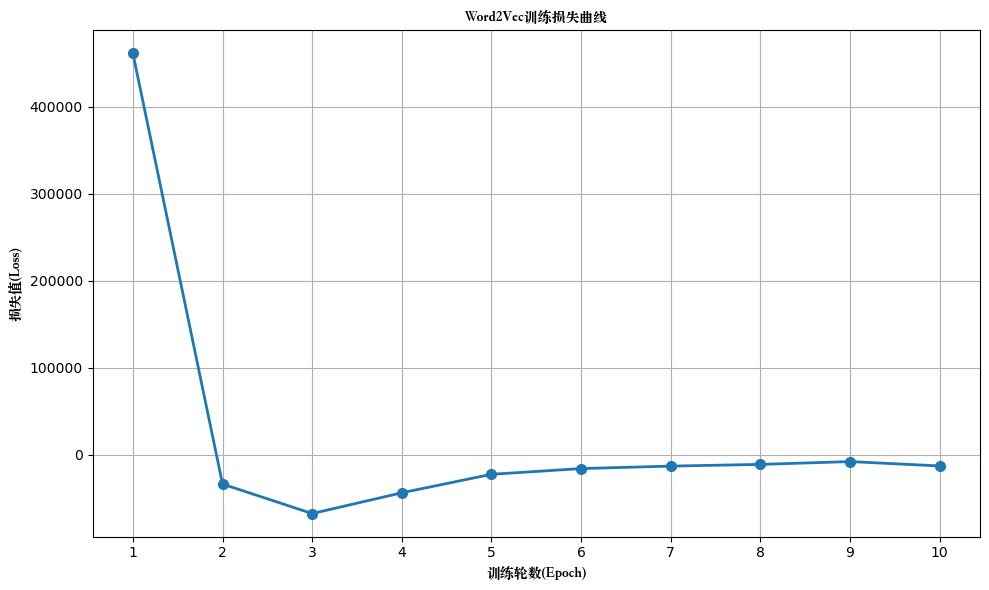

In [69]:
#损失计算
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
#指定字体
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'
# 初始化模型（注意：不要设置 epochs，这里我们手动控制）
model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,
    compute_loss=True
)  
# 构建词汇表
model.build_vocab(sentences)

# 手动逐轮训练并记录损失
losses = []
previous_loss = 0
epochs = 10

for epoch in range(epochs):
    model.train(
        sentences,
        total_examples=model.corpus_count,
        epochs=1,
        compute_loss=True
    )
    current_loss = model.get_latest_training_loss()
    epoch_loss = current_loss - previous_loss
    losses.append(epoch_loss)
    previous_loss = current_loss
## 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, 'o-',  color='#1f77b4',  # 主色：蓝色
    linewidth=2,          # 线条宽度
    markersize=7,         # 标记点大小
    label='Training Loss' # 添加图例标签
)
from matplotlib.font_manager import FontProperties  # Import FontProperties for custom fonts
font_prop = FontProperties(fname=font_path)  # Create a FontProperties object with the specified font path

plt.title('Word2Vec训练损失曲线', fontproperties=font_prop)
plt.xlabel('训练轮数(Epoch)', fontproperties=font_prop)
plt.ylabel('损失值(Loss)', fontproperties=font_prop)
plt.grid(True)
plt.xticks(range(1, epochs + 1))
plt.tight_layout()

plt.show()

In [58]:
from gensim.models.callbacks import CallbackAny2Vec
class callback(CallbackAny2Vec):
    def _init_(self):
        self.epoch = 0
        self.loss_to_be_subed = 0
    def on_epoch_end(self,model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('loss after epoch{} :{}'.format(self.epoch, loss_now))
        self.epoch +=1

In [61]:
#自己训练词嵌入模型
from gensim.models import Word2Vec
#训练词嵌入模型
model = Word2Vec(
    sentences,
    seed = 42,
)